# **STEP 1: UNDERSTANDING THE DATA**

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
country = pd.read_csv('/content/Data_Negara_HELP.csv')
country

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
country.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [ ]:
country.shape

(167, 10)

In [ ]:
country.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 2: Data Cleansing

In [ ]:
# Mengecek apakah ada duplikasi di baris data C
country_duplicate = country.copy()
country_duplicate.drop_duplicates(subset=None, inplace=True)
country_duplicate.shape

# Mengecek kolum apakah ada nilai null 
country.isnull().sum()

#  Mengecek baris apakah ada nilai null
(country.isnull().sum(axis=1) * 100 / len(country)).value_counts(ascending=False)

0.0    167
dtype: int64

In [ ]:
country.Negara.nunique()

167

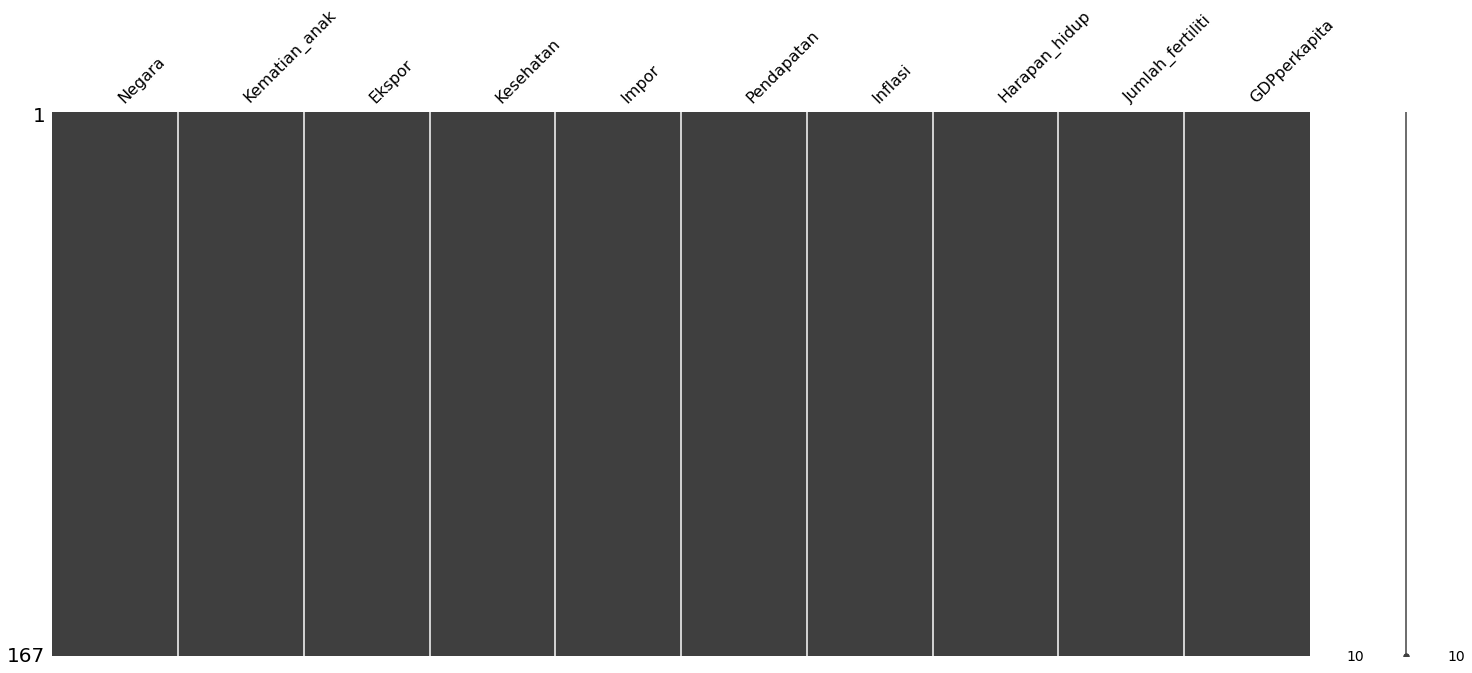

In [161]:
#Null value analysis
mn.matrix(country)

In [ ]:
#Column wise null value
country.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [162]:
#row wise null values
(country.isnull().sum(axis=1) * 100 / len(country)).value_counts(ascending=False)

0.0    167
dtype: int64

In [ ]:
country.dtypes

Negara               object
Kematian_anak       float64
Ekspor              float64
Kesehatan           float64
Impor               float64
Pendapatan            int64
Inflasi             float64
Harapan_hidup       float64
Jumlah_fertiliti    float64
GDPperkapita          int64
dtype: object

In [165]:
#finding duplicates
print('There are {} duplicates in dataset'.format(len(country[country.duplicated()])))

There are 0 duplicates in dataset


Kita dapat melihat bahwa


*   Dataframe memiliki 167 baris dan 10 kolom
*   Data tidak memiliki *null* values dan bisa dilanjutkan untuk analisis data.







# Transformasi Data


In [ ]:
for i in ['Impor','Ekspor','Kesehatan']:
    country[i] = (country[i] * country['GDPperkapita'])/100
country.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Outlier Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

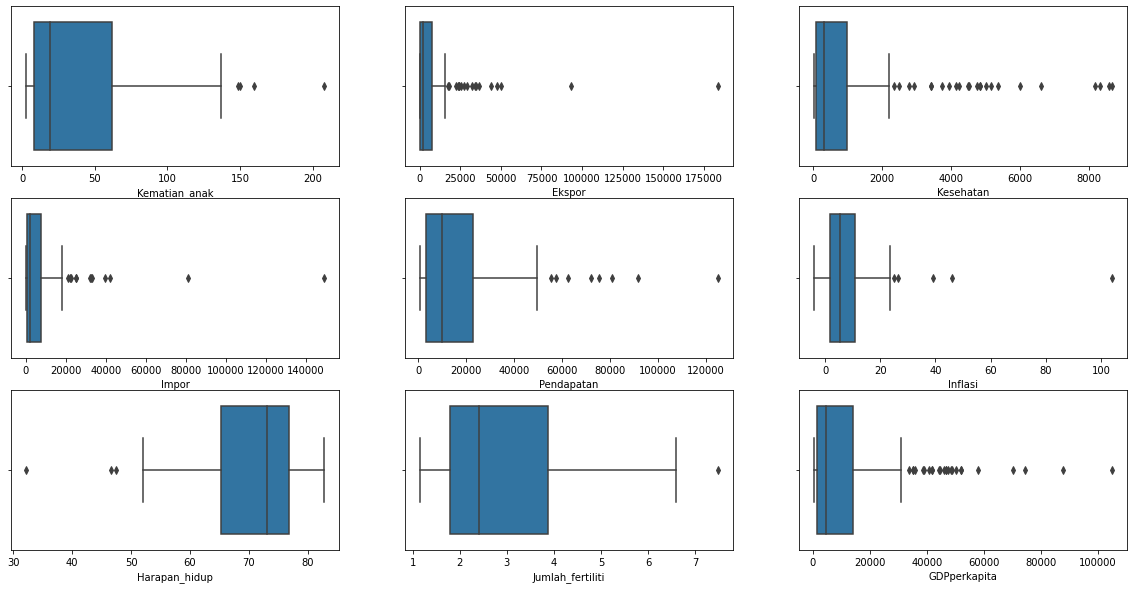

In [163]:
# checking the outliers

plt.figure(figsize = (20,10))

for i in enumerate(country.columns[1:]): # kolom pertama adalah negara jadi dihapuss.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])



*   Semua data memiliki outliers
*   Tidak bisa menghapus outliers,karena akan membatasi negara yang membutuhkan bantuan yang menjadi fokus utama. Solusinya, tidak men-*treat* outlier dan memeriksa nilai K means.



# Exploratory Data Analysis

melihat distribusi data

# Univariate Analysis - Boxplot


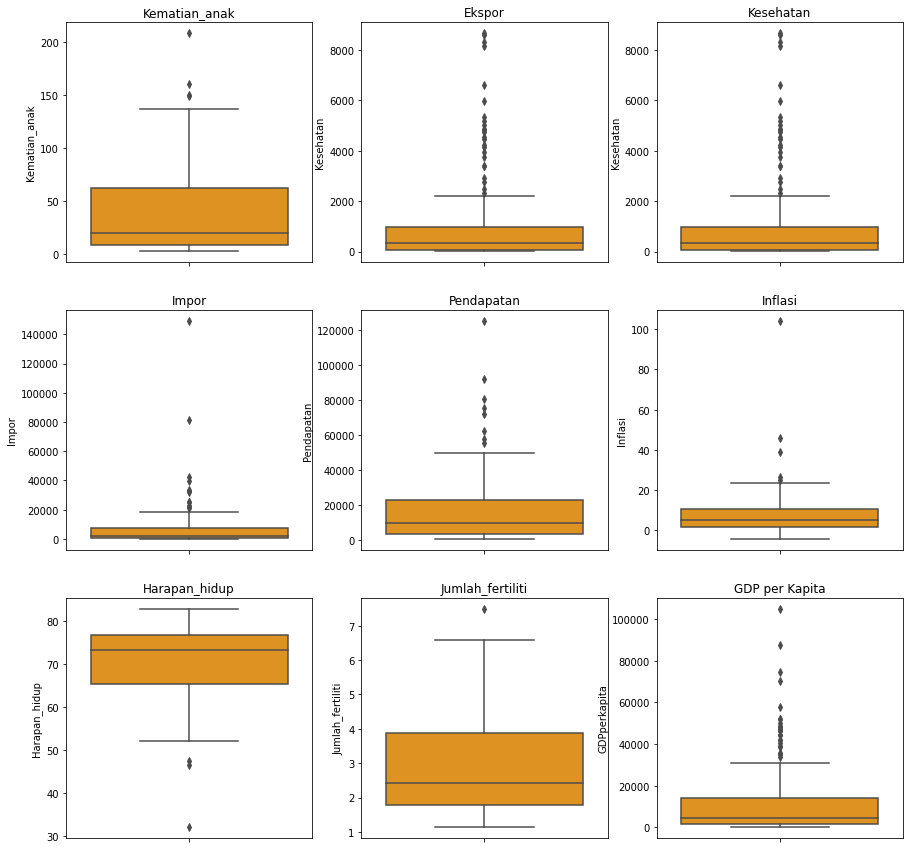

In [171]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
s=sns.boxplot(y=country.Kematian_anak,ax=axes[0, 0],color="#FC9803")
axes[0, 0].set_title('Kematian_anak')
s=sns.boxplot(y=country.Kesehatan,ax=axes[0, 1],color="#FC9803")
axes[0, 1].set_title('Ekspor')
s=sns.boxplot(y=country.Kesehatan,ax=axes[0, 2],color="#FC9803")
axes[0, 2].set_title('Kesehatan')

s=sns.boxplot(y=country.Impor,ax=axes[1, 0],color="#fc9803")
axes[1, 0].set_title('Impor')
s=sns.boxplot(y=country.Pendapatan,ax=axes[1, 1],color="#fc9803")
axes[1, 1].set_title('Pendapatan')
s=sns.boxplot(y=country.Inflasi,ax=axes[1, 2],color="#fc9803")
axes[1, 2].set_title('Inflasi')

s=sns.boxplot(y=country.Harapan_hidup,ax=axes[2, 0],color="#fc9803")
axes[2, 0].set_title('Harapan_hidup')
s=sns.boxplot(y=country.Jumlah_fertiliti,ax=axes[2, 1],color="#fc9803")
axes[2, 1].set_title('Jumlah_fertiliti')
s=sns.boxplot(y=country.GDPperkapita,ax=axes[2, 2],color="#fc9803")
axes[2, 2].set_title('GDP per Kapita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

# Bivariate Analysis

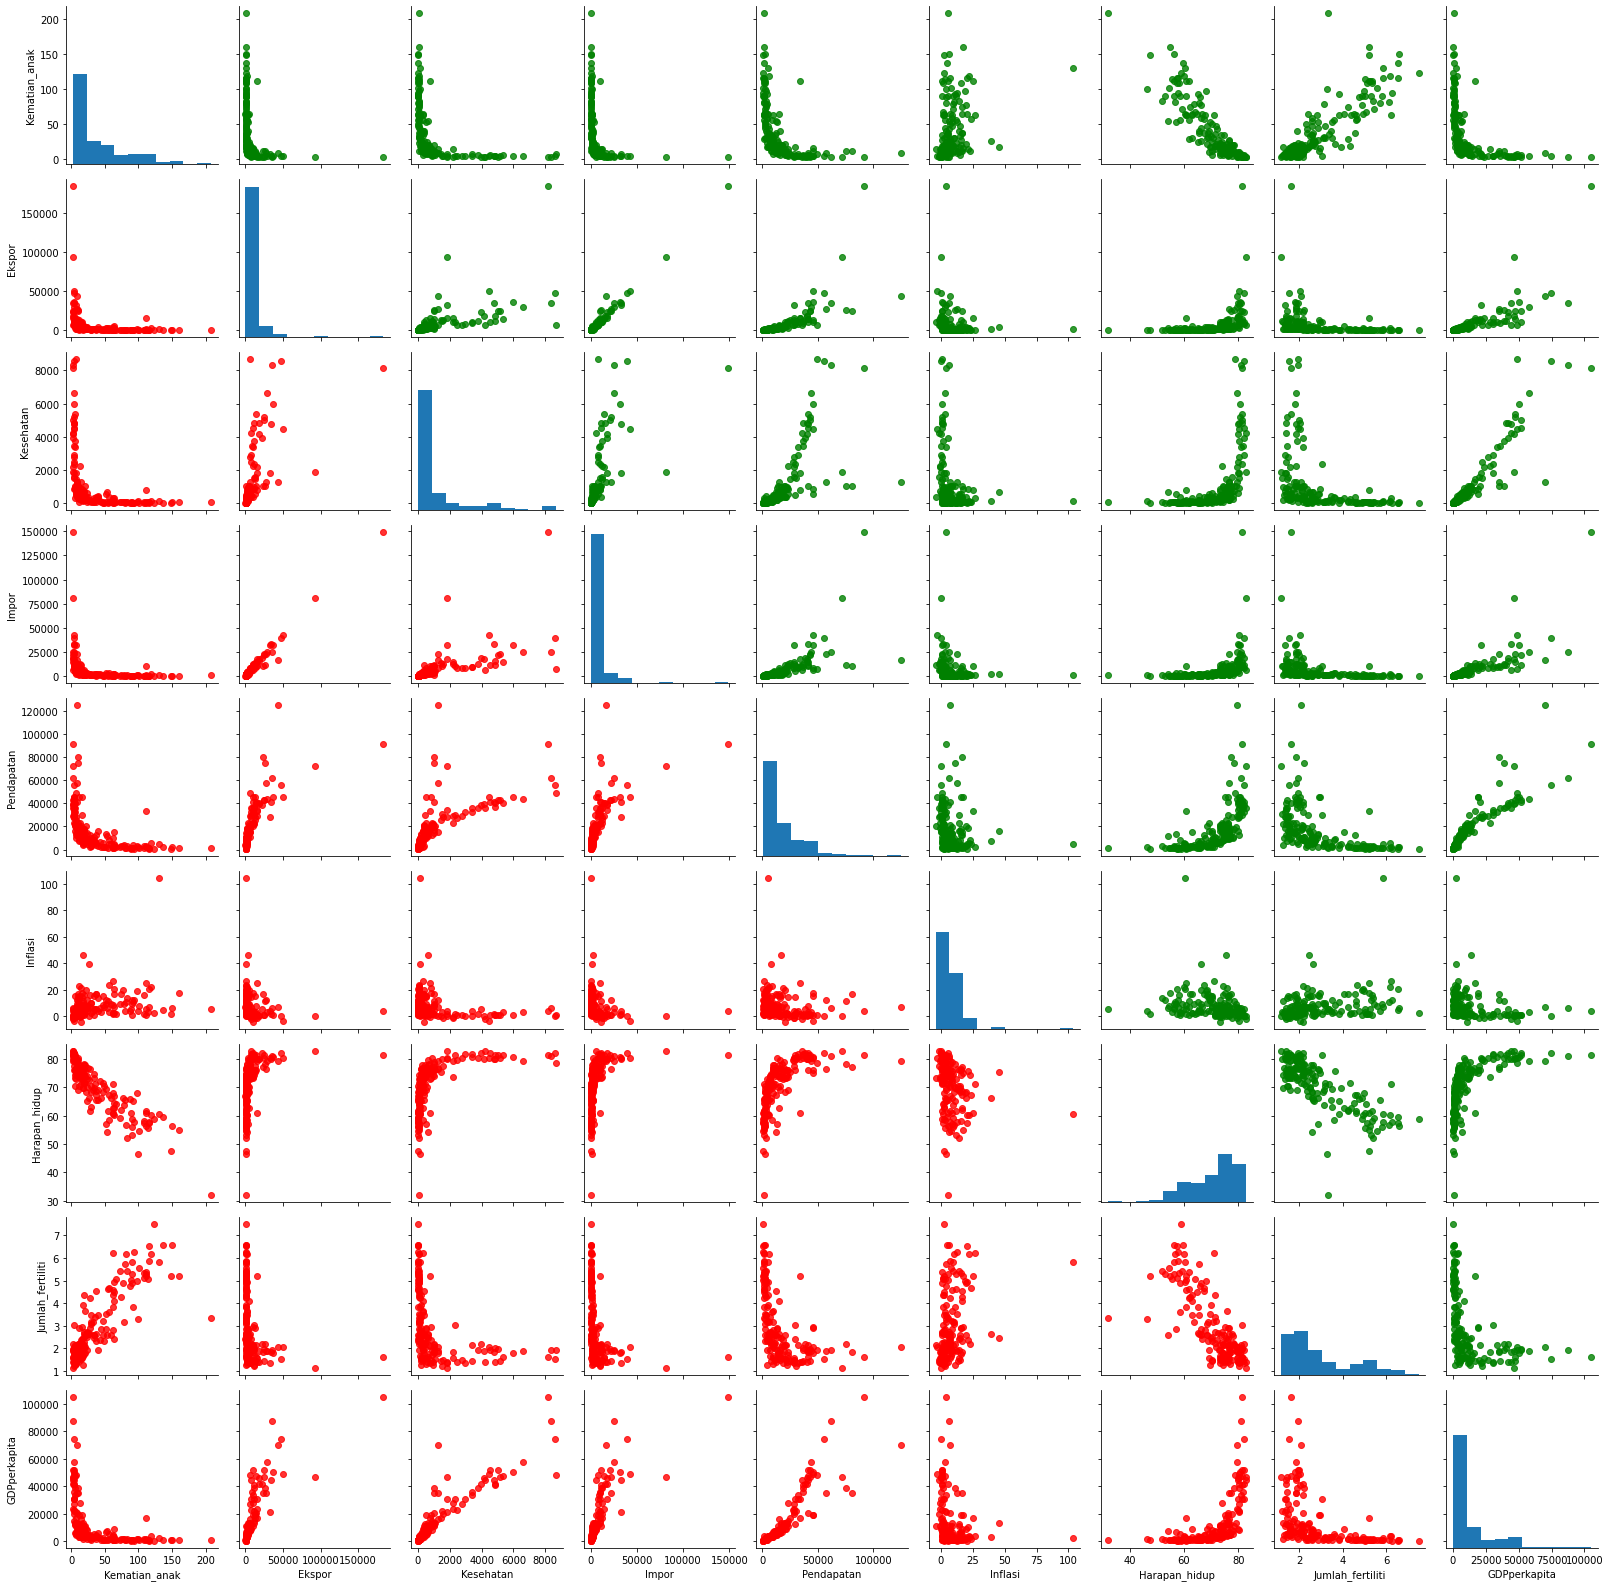

In [157]:
num_df = country[['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi','Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
]
pair = sns.PairGrid(num_df)
pair.map_upper(sns.regplot,color ='green', fit_reg = False)
pair.map_lower(sns.regplot, color ='red', fit_reg = False)
pair.map_diag(plt.hist)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

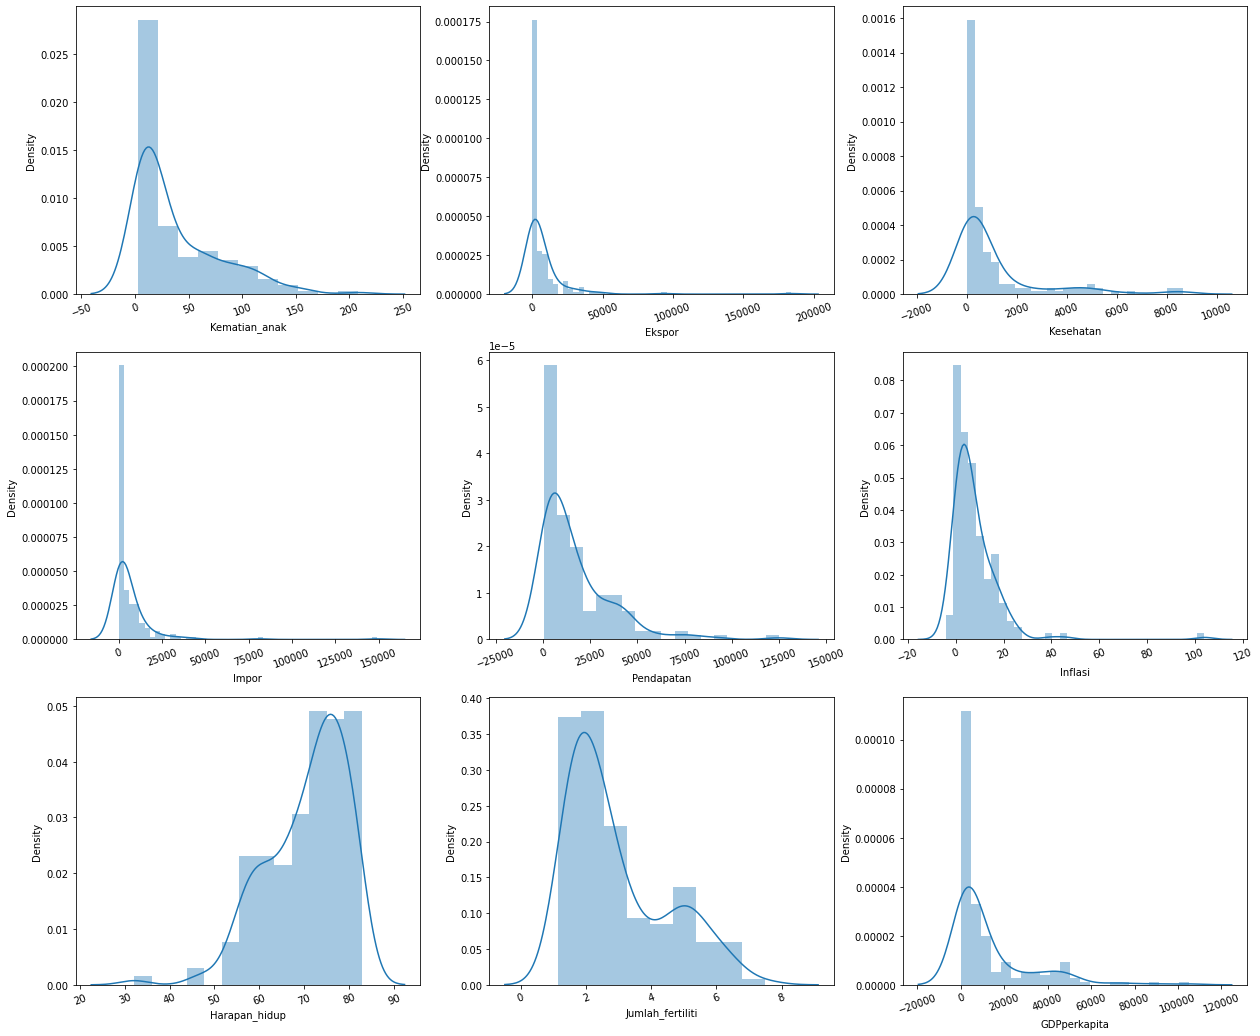

In [158]:
plt.figure(figsize=(21, 18))
features = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi','Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(num_df[i[1]])
    plt.xticks(rotation=20)



*   Tidak semua dara terdistribusi normal

*   Varians tidak seragam, data perlu distandarisasi.
*   Perlu menghitung jarak Eucladian antara titik data untuk pengelompokan, memastikan nilai dengan rentang tinggi tidak melebihi dengan nilai yang rentang kecil.



Correlation Heatmap

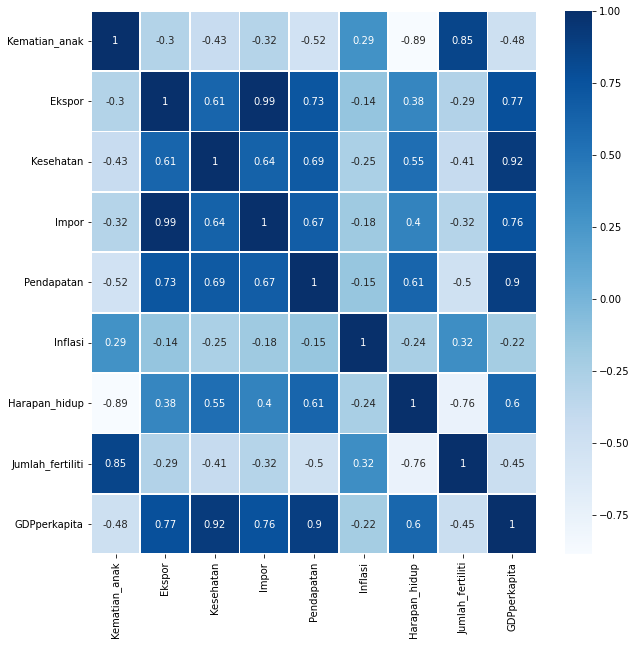

In [166]:
#Correlation Heatmap
plt.figure(figsize = (10,10))
ax= sns.heatmap(country.corr(), annot = True, cmap="Blues",linewidth =1)
#plt.savefig('Correlation Heatmap')
plt.show()

# Standarisasi Data

In [ ]:
new_country = country[country.columns[country.dtypes != 'object']]
new_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    int64  
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [ ]:
new_country.describe()


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#Rescaling Data

In [ ]:
# instantiate 
scaler = StandardScaler()

# fit_transform
scaled_data = pd.DataFrame(scaler.fit_transform(new_country))

scaled_data.columns = country.columns[country.dtypes != 'object']

scaled_data.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Hopkins Statistics


In [153]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins_test(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [154]:
#Using the Hopkins Statistic function by passing the above dataframe as a parameter
hopkins_test(scaled_data)

0.9295580127470728

Jika nilai diantara {0,7...0,99} siap untuk dikluster.

# Model Building


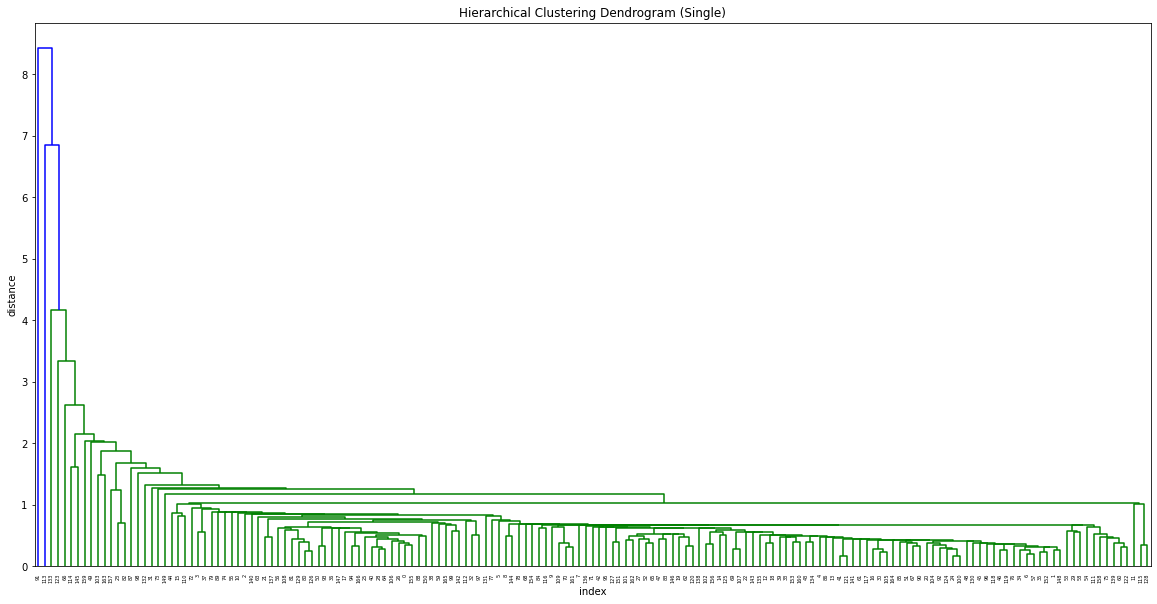

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('index')
plt.ylabel('distance')
merging_s = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(merging_s)
plt.show()

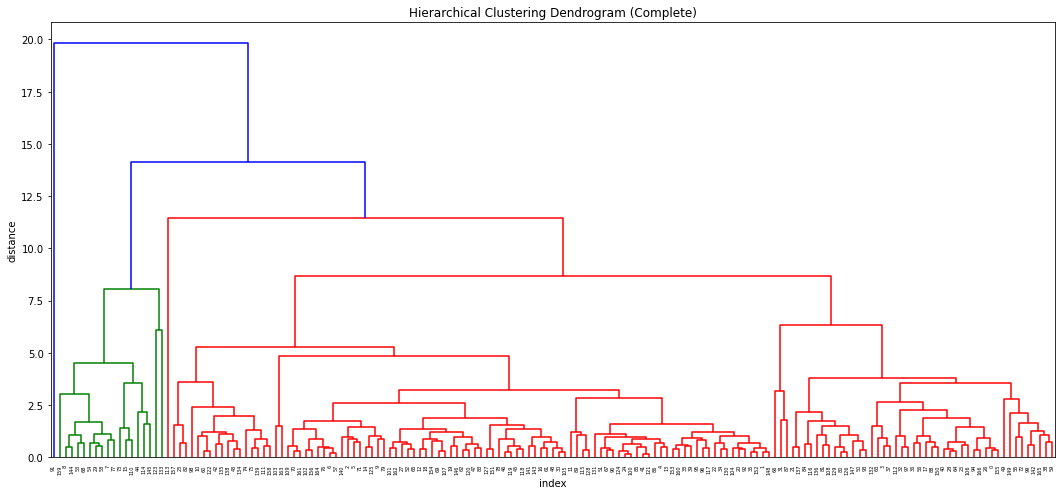

In [ ]:
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('index')
plt.ylabel('distance')
merging_c = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(merging_c)
plt.show()

In [ ]:
#clustering with K means
cluster_label_3 = cut_tree(merging_c, n_clusters = 3).reshape(-1,)
cluster_label_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#membuat dataframe dengan cluster
cntry_data_h = country.copy()
cntry_data_h['cluster_label_3'] = cluster_label_3
cntry_data_h.head()


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


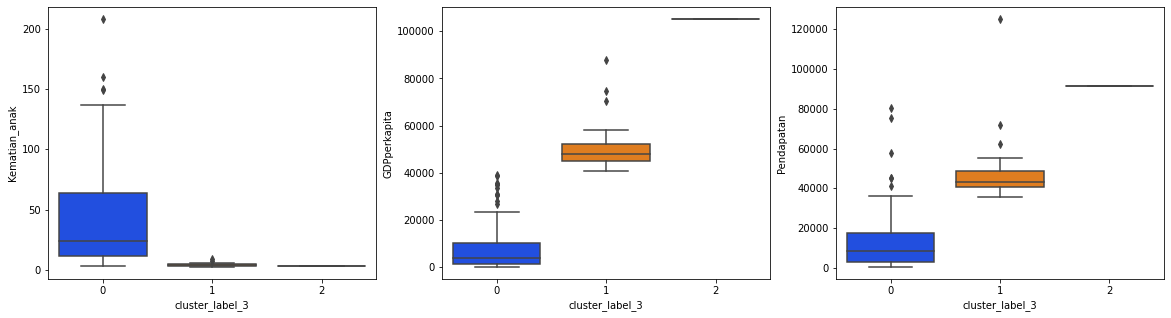

In [ ]:
#Boxplot on various features against CLUSTER_ID  to visualize the spread of data
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_label_3', y='Kematian_anak', data=cntry_data_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_label_3', y='GDPperkapita', data=cntry_data_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_label_3', y='Pendapatan', data=cntry_data_h, palette="bright")

plt.show()

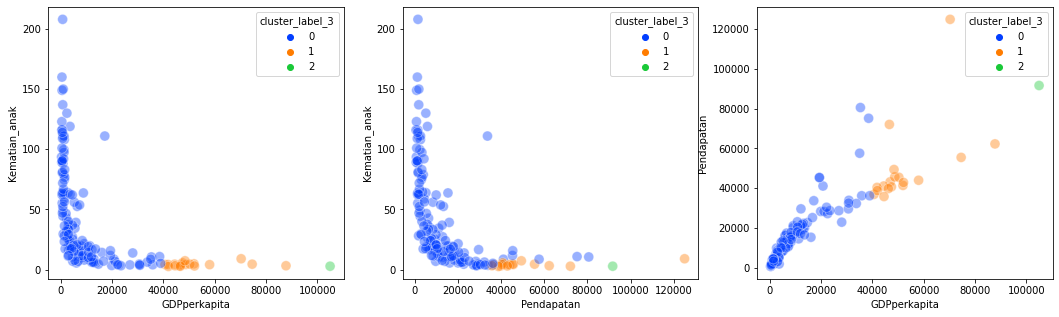

In [ ]:
# plotting scatter plot on various features to visualize the clusters based on them
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='cluster_label_3',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='cluster_label_3',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='cluster_label_3',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [ ]:
#checking cluster count
cntry_data_h.cluster_label_3.value_counts()


0    148
1     18
2      1
Name: cluster_label_3, dtype: int64

In [ ]:
#checking countries in cluster 2
cntry_data_h[cntry_data_h['cluster_label_3'] == 2]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [ ]:
#checking countries in cluster 1
cntry_data_h[cntry_data_h['cluster_label_3'] == 1]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1




*   Cluster 1 dan 2 merupakan negara berkembang dan maju. Berdasarkan segmentasi ini, negara yang dibawah berkembang masuk ke cluster 0.




# 4 Cluster

In [ ]:
#4 cluster
cluster_label_4 = cut_tree(merging_c, n_clusters = 4).reshape(-1,)
cluster_label_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cntry_data_h['cluster_label_4'] = cluster_label_4

cntry_data_h.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


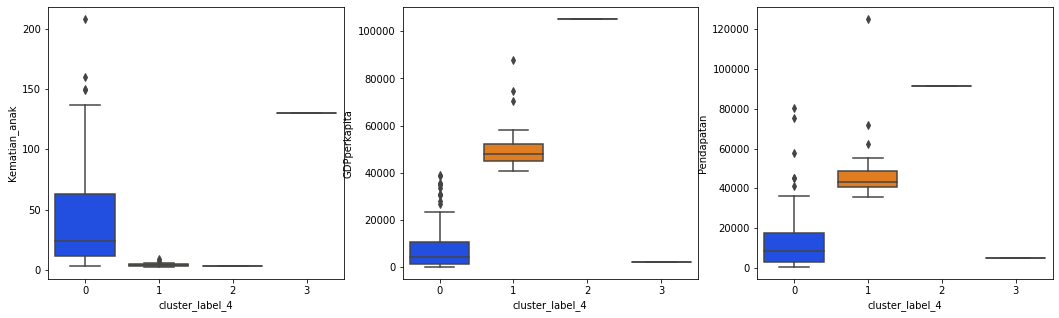

In [ ]:
#Boxplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_label_4', y='Kematian_anak', data=cntry_data_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_label_4', y='GDPperkapita', data=cntry_data_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_label_4', y='Pendapatan', data=cntry_data_h, palette="bright")

plt.show()

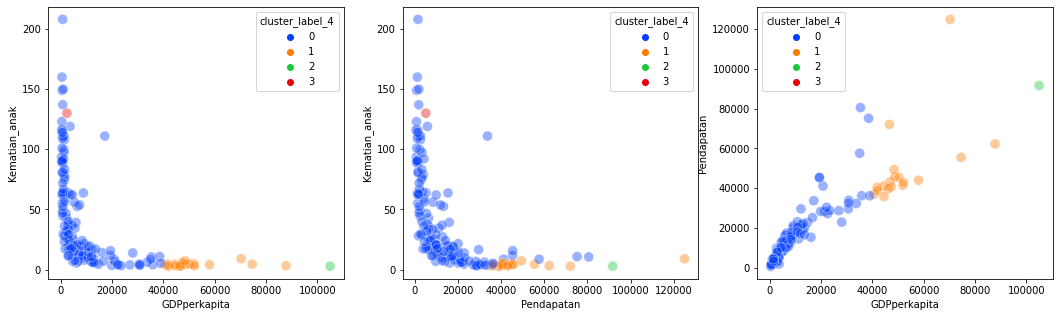

In [ ]:
#Scatterplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='cluster_label_4',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='cluster_label_4',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='cluster_label_4',
                data=cntry_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [ ]:
cntry_data_h.cluster_label_4.value_counts()


0    147
1     18
3      1
2      1
Name: cluster_label_4, dtype: int64

In [ ]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

cntry_data_h[cntry_data_h['cluster_label_4'] == 2]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


In [ ]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

cntry_data_h[cntry_data_h['cluster_label_4'] == 3]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,3


In [ ]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

cntry_data_h[cntry_data_h['cluster_label_4'] == 1]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1,1




*   3 cluster ideal untuk penomoran, ada 4 kluster. Nigeria masuk ke kluster yang berbeda.Karena Nigeria merupakan negara under development, dilihat dari angka kematian anak yang tinggi.



# Intrepretasi Kluster dari Model Hierarchial Clustering

In [ ]:
cntry_data_h_analysis = cntry_data_h.groupby(['cluster_label_3']).mean()
cntry_data_h_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_4
cluster_label_3,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [ ]:
# Creating a new field for count of observations in each cluster
cntry_data_h_analysis['Observations']=cntry_data_h[['cluster_label_3','Kematian_anak']].groupby(['cluster_label_3']).count()
cntry_data_h_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_4,Observations
cluster_label_3,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [ ]:
# Creating a new field for proportion of observations in each cluster
cntry_data_h_analysis['Proportion']=round(cntry_data_h_analysis['Observations']/cntry_data_h_analysis['Observations'].sum(),2)
cntry_data_h_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_4,Observations,Proportion
cluster_label_3,,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18,0.11
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1,0.01


<Figure size 720x360 with 0 Axes>

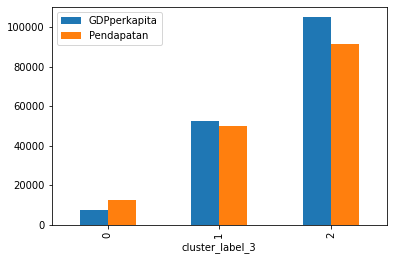

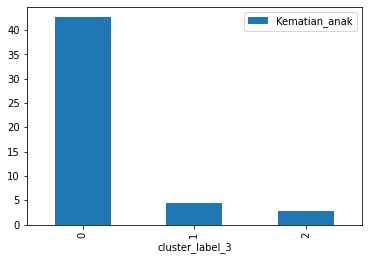

In [ ]:
plt.figure(figsize=(10, 5))
cntry_data_h_plot1=cntry_data_h[['cluster_label_3','GDPperkapita','Pendapatan']].copy()
cntry_data_h_plot1=cntry_data_h_plot1.groupby('cluster_label_3').mean()
cntry_data_h_plot1.plot.bar()

cntry_data_h_plot2=cntry_data_h[['cluster_label_3','Kematian_anak']].copy()
cntry_data_h_plot2=cntry_data_h_plot2.groupby('cluster_label_3').mean()
cntry_data_h_plot2.plot.bar()
plt.show()



*   Cluster 0 memiliki rata-rata tingkat kematian anak yang tinggi sekitar 40 dibandingkan dengan 2 kluster lainnya yang memiliki nilai GDP rendah dan pendapatan rendah
*   Cluster 0 ideal sebagai persyaratan. Terdiri dari 89 negara dan 147 negara dari 167 negara.


*   Clustering tidak selalu memberikan data yang tepat, karena 89% dibawah cluster 1.Akan dicek lebih lanjut menggunakan K-Means Clustering.








# Menemukan Nilai Optimal untuk Clustering

SSD/Elbow Curve

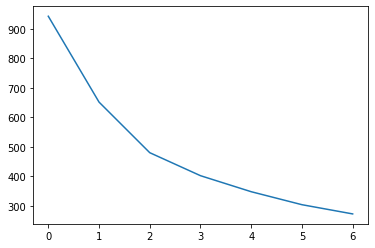

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [ ]:
#silhoutte analysis
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43691519384855926
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.31136565295133073
For n_clusters=8, the silhouette score is 0.2970233244812986


Dari dua validasi, Elbow Curve dan Silhoutte analysis, cluster 3,4 dan 5 merupakan nomor yang optimal.

# K Means Clustering

In [ ]:
#First iteration-3 clusters
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(scaled_data)
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
# Create a new datafame with scaled data and adding country name to it.
cntry_data_k = cntry_data_h.copy()
cntry_data_k.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [ ]:
# assigning the label
cntry_data_k['cluster_id_3'] = kmeans_3.labels_
cntry_data_k.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2


In [ ]:
# Checking the number of countries in each cluster
cntry_data_k.cluster_id_3.value_counts()

2    91
0    48
1    28
Name: cluster_id_3, dtype: int64

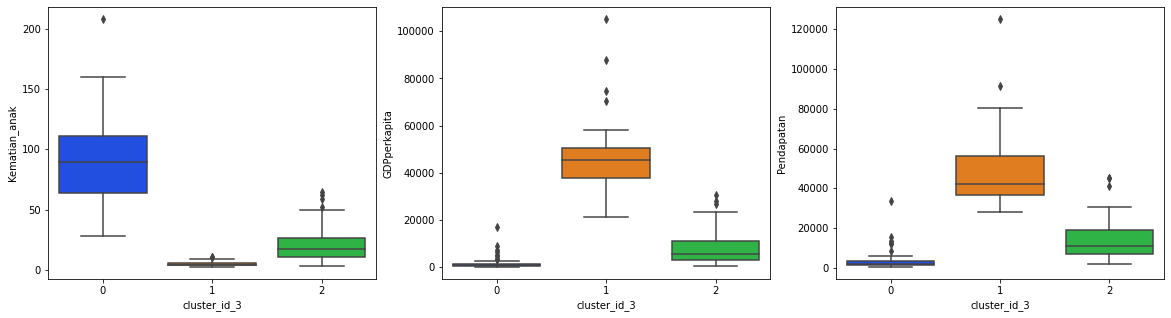

In [ ]:
#Boxplot
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='Kematian_anak',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='GDPperkapita',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='Pendapatan',
            data=cntry_data_k, palette="bright")

plt.show()

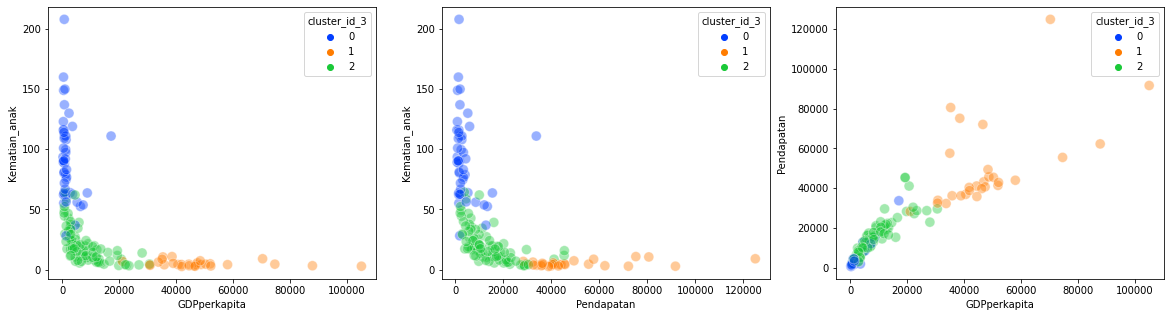

In [ ]:
#Scatterplot
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [ ]:
# Checking the CLuster means:
cntry_data_k.groupby(['cluster_id_3']).mean().sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4
cluster_id_3,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286




*   Cluster 2 dan 0 memiliki tingkat kematian anak yang tinggi dan GDPperkapita dan pendapatan yang rendah. Mengecek negara yang berada di cluster 2 dan 0.




In [ ]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_3'] == 2].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500
60,Greece,3.9,28700,26900
43,Czech Republic,3.4,28300,19800


Second Iterations- K Cluster

In [ ]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_3'] == 0].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [ ]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(scaled_data)
kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
# assigning the label
cntry_data_k['cluster_id_4'] = kmeans_4.labels_
cntry_data_k.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2,0


In [ ]:
# Checking the number of countries in each cluster

cntry_data_k.cluster_id_4.value_counts()

0    88
1    48
3    29
2     2
Name: cluster_id_4, dtype: int64

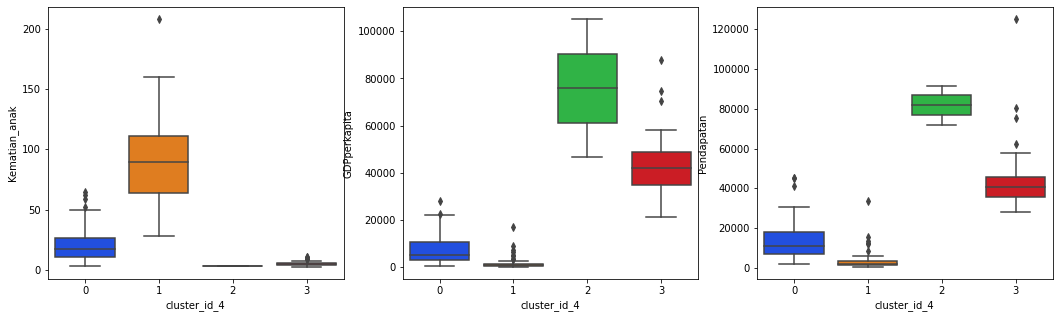

In [ ]:
#Visualisasi
#Boxplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='Kematian_anak',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='GDPperkapita',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='Pendapatan',
            data=cntry_data_k, palette="bright")

plt.show()

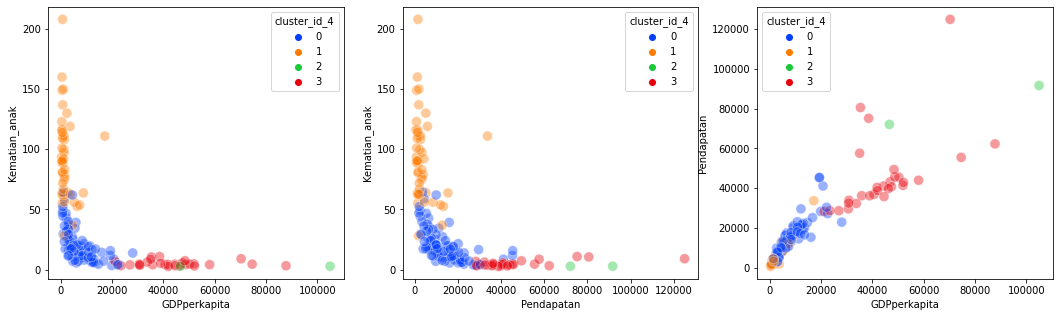

In [ ]:
#Scatterplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='cluster_id_4',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='cluster_id_4',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='cluster_id_4',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [ ]:
#Checking Cluster meaning
cntry_data_k.groupby(['cluster_id_4']).mean().sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,0.000000
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,0.000000,0.000000,2.000000
3,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,0.586207,0.586207,1.103448
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,1.000000




*   Cluster 1 dan 0 memiliki nilai kematian yang tinggi dan pendapatan serta GDP rendah
*   List item



In [ ]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_4'] == 1].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [ ]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_4'] == 0].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
41,Croatia,5.5,20100,13500
51,Estonia,4.5,22700,14600
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500


Third Iteration-5 clusters

In [ ]:
# K Means with with k=5
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_5.fit(scaled_data)
kmeans_5.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
# assigning the label
cntry_data_k['cluster_id_5'] = kmeans_5.labels_
cntry_data_k.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4,cluster_id_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2,0,0


In [ ]:
# Checking the number of countries in each cluster

cntry_data_k.cluster_id_5.value_counts()

0    87
1    47
3    30
2     2
4     1
Name: cluster_id_5, dtype: int64

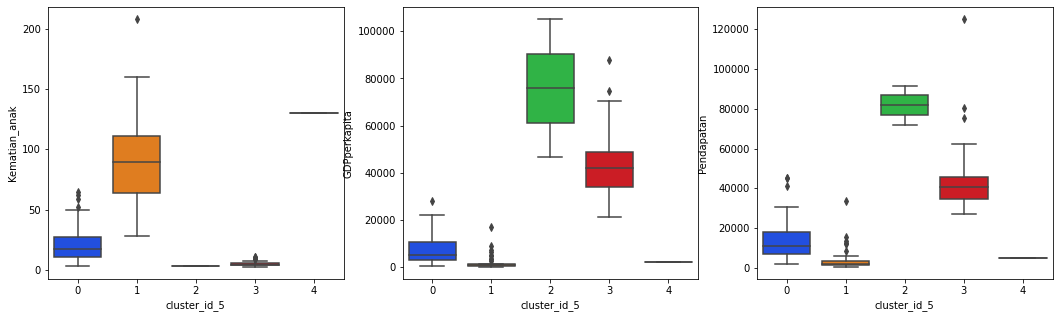

In [ ]:
#Visualisasi
#Boxplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='Kematian_anak',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='GDPperkapita',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='Pendapatan',
            data=cntry_data_k, palette="bright")

plt.show()

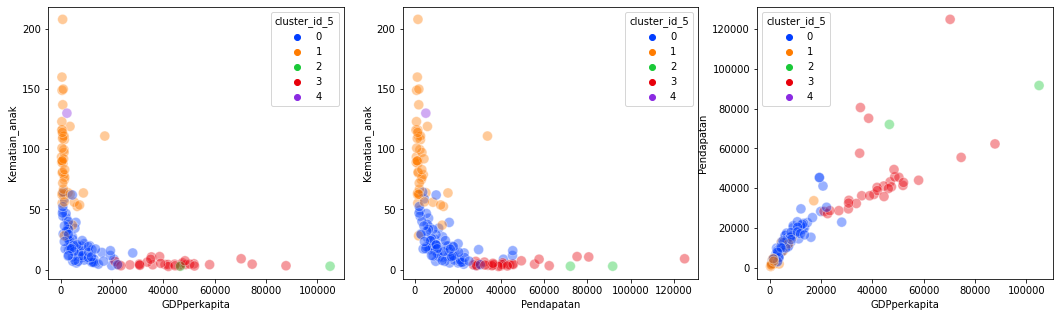

In [ ]:
#Scatterplot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='cluster_id_5',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='cluster_id_5',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='cluster_id_5',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [ ]:
# Checking the CLuster means:
cntry_data_k.groupby(['cluster_id_5']).mean().sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4
cluster_id_5,,,,,,,,,,,,,
4,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000,3.000000,0.000000,1.0
1,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,0.000000,0.000000,1.0
0,21.113793,3328.149408,460.000120,3404.497944,13297.586207,7.371506,73.147126,2.251954,7158.298851,0.000000,0.000000,2.000000,0.0
3,5.043333,21018.310000,4031.304333,17806.070000,45180.000000,2.764533,80.383333,1.799667,43300.000000,0.566667,0.566667,1.133333,2.9
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,1.000000,2.0




*   Cluster 4 dan 1 memiliki nilai kematian anak tinggi, pendapatan dan GDP rendah.
* 



In [ ]:
# Checking the countries in Cluster 4 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_5'] == 4].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
113,Nigeria,130.0,5150,2330


In [ ]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

cntry_data_k[['Negara','Kematian_anak','Pendapatan','GDPperkapita']][cntry_data_k['cluster_id_5'] == 1].sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575
64,Guinea-Bissau,114.0,1390,547


# Interpreting the Clusters from K-Means model


In [ ]:
#New dataframe for group by & analysis

cntry_data_k_analysis =  cntry_data_k.groupby(['cluster_id_3']).mean().sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])
cntry_data_k_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_4,cluster_id_5
cluster_id_3,,,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,1.062500
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.098901,0.131868
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.928571,2.928571


In [ ]:
# Creating a new field for count of observations in each cluster

cntry_data_k_analysis['Observations']=cntry_data_k[['cluster_id_3','Kematian_anak']].groupby(['cluster_id_3']).count()
cntry_data_k_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_label_3,cluster_label_4,cluster_id_4,cluster_id_5,Observations
cluster_id_3,,,,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,1.062500,48
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.098901,0.131868,91
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.928571,2.928571,28


In [ ]:
# Creating a new field for proportion of observations in each cluster

cntry_data_k_analysis['Proportion']=round(cntry_data_k_analysis['Observations']/cntry_data_k_analysis['Observations'].sum(),2)


#Summary View
cntry_data_k_analysis[['Kematian_anak','Pendapatan','GDPperkapita','Observations','Proportion']]

,Kematian_anak,Pendapatan,GDPperkapita,Observations,Proportion
cluster_id_3,,,,,
0,91.610417,3897.354167,1909.208333,48,0.29
2,20.357143,13968.021978,7979.912088,91,0.54
1,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

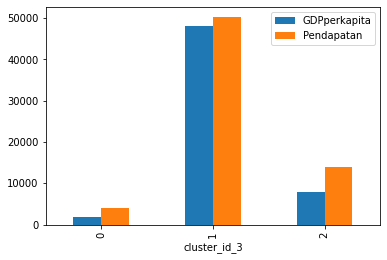

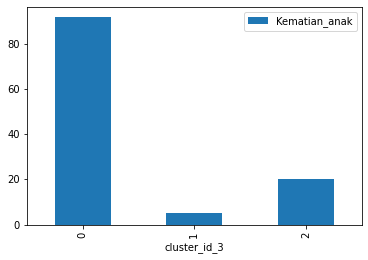

In [ ]:
plt.figure(figsize=(8, 5))
cntry_data_k_plot1=cntry_data_k[['cluster_id_3','GDPperkapita','Pendapatan']].copy()
cntry_data_k_plot1=cntry_data_k_plot1.groupby('cluster_id_3').mean()
cntry_data_k_plot1.plot.bar()

cntry_data_k_plot2=cntry_data_k[['cluster_id_3','Kematian_anak']].copy()
cntry_data_k_plot2=cntry_data_k_plot2.groupby('cluster_id_3').mean()
cntry_data_k_plot2.plot.bar()

Kluster 0 memiliki nilai kematian anak tertinggi sebesar 92 dibandingkan 2 kluster lainnya, ditunjukkan dengan rendahnya GDP dan pendapatan. Kluster ini menujukkan kandidat terbaik yang menerima bantuan finansial dari HELP.

In [ ]:
#Renaming Cluster
cntry_data_k_analysis = cntry_data_k_analysis.rename({
    2: 'Developing Countries',
    1: 'Developed Countries',
    0: 'Under_Developed Countries'}).reset_index()

In [ ]:
cntry_data_k_analysis[['cluster_id_3','Kematian_anak','Pendapatan','GDPperkapita','Observations','Proportion']]

,cluster_id_3,Kematian_anak,Pendapatan,GDPperkapita,Observations,Proportion
0,Under_Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


In [ ]:
cntry_data_k_analysis[['cluster_id_4','Kematian_anak','Pendapatan','GDPperkapita','Observations','Proportion']]

,cluster_id_4,Kematian_anak,Pendapatan,GDPperkapita,Observations,Proportion
0,1.000000,91.610417,3897.354167,1909.208333,48,0.29
1,0.098901,20.357143,13968.021978,7979.912088,91,0.54
2,2.928571,5.046429,50178.571429,48114.285714,28,0.17


# Analysing Under Developed Countries

In [ ]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = cntry_data_k[cntry_data_k['cluster_id_3'] == 0].copy()
final_cluster = final_cluster[['Negara', 'Kematian_anak', 'Pendapatan', 'GDPperkapita']]

In [ ]:
final_cluster.sort_values([ 'GDPperkapita', 'Pendapatan','Kematian_anak'], ascending=[True, True, False])

,Negara,Kematian_anak,Pendapatan,GDPperkapita
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


In [ ]:
final_cluster.describe()


,Kematian_anak,Pendapatan,GDPperkapita
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000



*   Melihat dari deksripsi statistik pada kluster Under-Developed, beberapa mempunyai pendapatan dan nilai GDP yang tinggi
*   Kita ingin nilai dari kematian anak, pendapatan dan GDP berada di median
Filtering negara yang berada di list dengan median pendapatan kurang dari 1860 dan GDP kurang dari 932.  Kematian anak >=90.
*   Mengidentifikasi negara dengan pendapatan dan GDP terendah dengan nilai kematian anak yang besar. 
  







# Final Data
We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.



In [ ]:
Under_Developed_Countries = country[country['GDPperkapita'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['GDPperkapita'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'GDPperkapita', 'Pendapatan','Kematian_anak'], ascending=[True, True, False])

In [ ]:
Under_Developed_Countries[['Negara', 'Kematian_anak', 'GDPperkapita', 'Pendapatan']]

,Negara,Kematian_anak,GDPperkapita,Pendapatan
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


Data dengan pendapatan kurang dari median <=1860

In [ ]:
Under_Developed_Countries = country[country['Pendapatan'] <= 1860]
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['GDPperkapita'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'GDPperkapita', 'Pendapatan','Kematian_anak'], ascending=[True, True, False])

In [ ]:
Under_Developed_Countries[['Negara', 'Kematian_anak', 'GDPperkapita', 'Pendapatan']]

,Negara,Kematian_anak,GDPperkapita,Pendapatan
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [ ]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['Kematian_anak'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'GDPperkapita', 'Pendapatan','Kematian_anak'], ascending=[True, True, False])

In [ ]:
Under_Developed_Countries[['Negara', 'Kematian_anak', 'GDPperkapita', 'Pendapatan']]

,Negara,Kematian_anak,GDPperkapita,Pendapatan
26,Burundi,93.6,231,764
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
150,Togo,90.3,488,1210
64,Guinea-Bissau,114.0,547,1390
0,Afghanistan,90.2,553,1610


Statistik Deskriptif untuk Cluster "Undeveloped Countries"

In [ ]:
# top 10 underdeveloped countries list to a new df

UDC_top_10=Under_Developed_Countries[['Negara', 'GDPperkapita', 'Pendapatan', 'Kematian_anak']].head(10).copy()
UDC_top_10

,Negara,GDPperkapita,Pendapatan,Kematian_anak
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [ ]:
UDC_top_10.describe()

,GDPperkapita,Pendapatan,Kematian_anak
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


Analisis Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

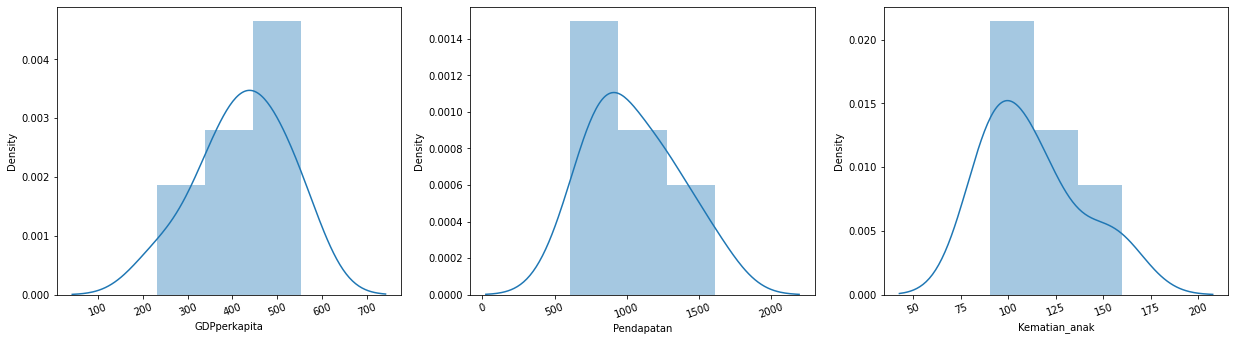

In [ ]:
plt.figure(figsize=(21, 18))
features = ['GDPperkapita','Pendapatan','Kematian_anak']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

Analisis Bivariate

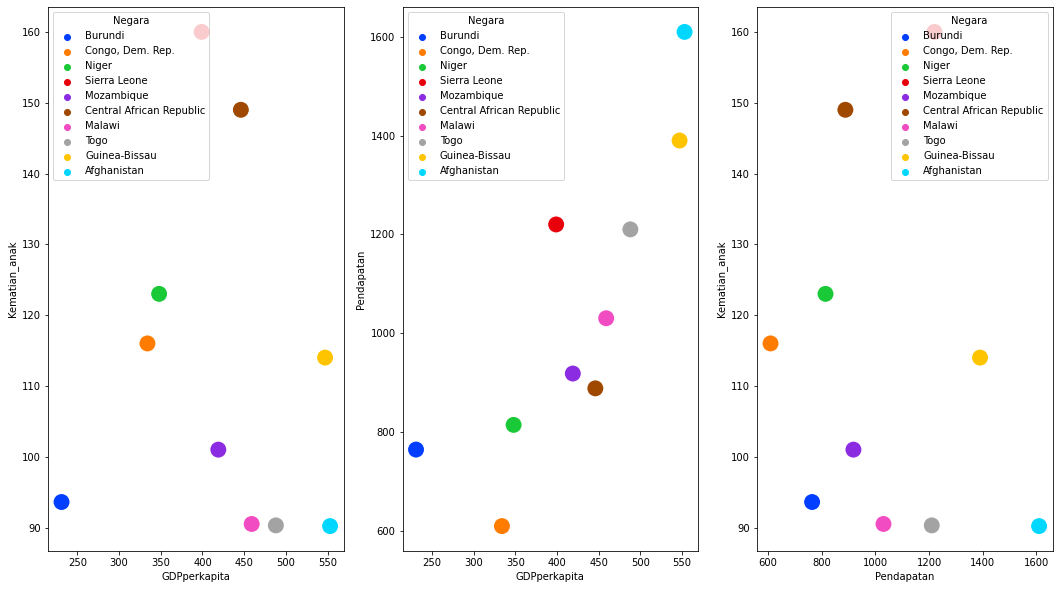

In [ ]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='Negara',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='Negara',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='Negara',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()


# Kesimpulan dan Rekomendasi


*   Telah dilakukan clustering secara sosio-ekonomi menggunakan data berbagai negara untuk mengidentifkasi negara yang membutuhkan bantuan keuangan dari NGO
*   Berdasarkan analisis clustering, didapatkan 10 negara yang membutuhkan bantuan keuangan dengan kategori nilai kematian anak tinggi, tingkat pendapatan dan nilai GDP rendah pada kluster "Undeveloped Countries".




In [ ]:
#Top 10 countries reccomendation for NGO financial aid
UDC_top_10

,Negara,GDPperkapita,Pendapatan,Kematian_anak
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2
